In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation/Train.csv
/kaggle/input/customer-segmentation/Test.csv


In [2]:
df = pd.read_csv('/kaggle/input/customer-segmentation/Train.csv')

In [3]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [5]:
df.fillna(df.mode().iloc[0], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [7]:
df.drop('ID', axis=1, inplace=True)

In [8]:
obj = df.select_dtypes(include='object')
num = df.select_dtypes(exclude='object')

In [9]:
obj.nunique()

Gender            2
Ever_Married      2
Graduated         2
Profession        9
Spending_Score    3
Var_1             7
Segmentation      4
dtype: int64

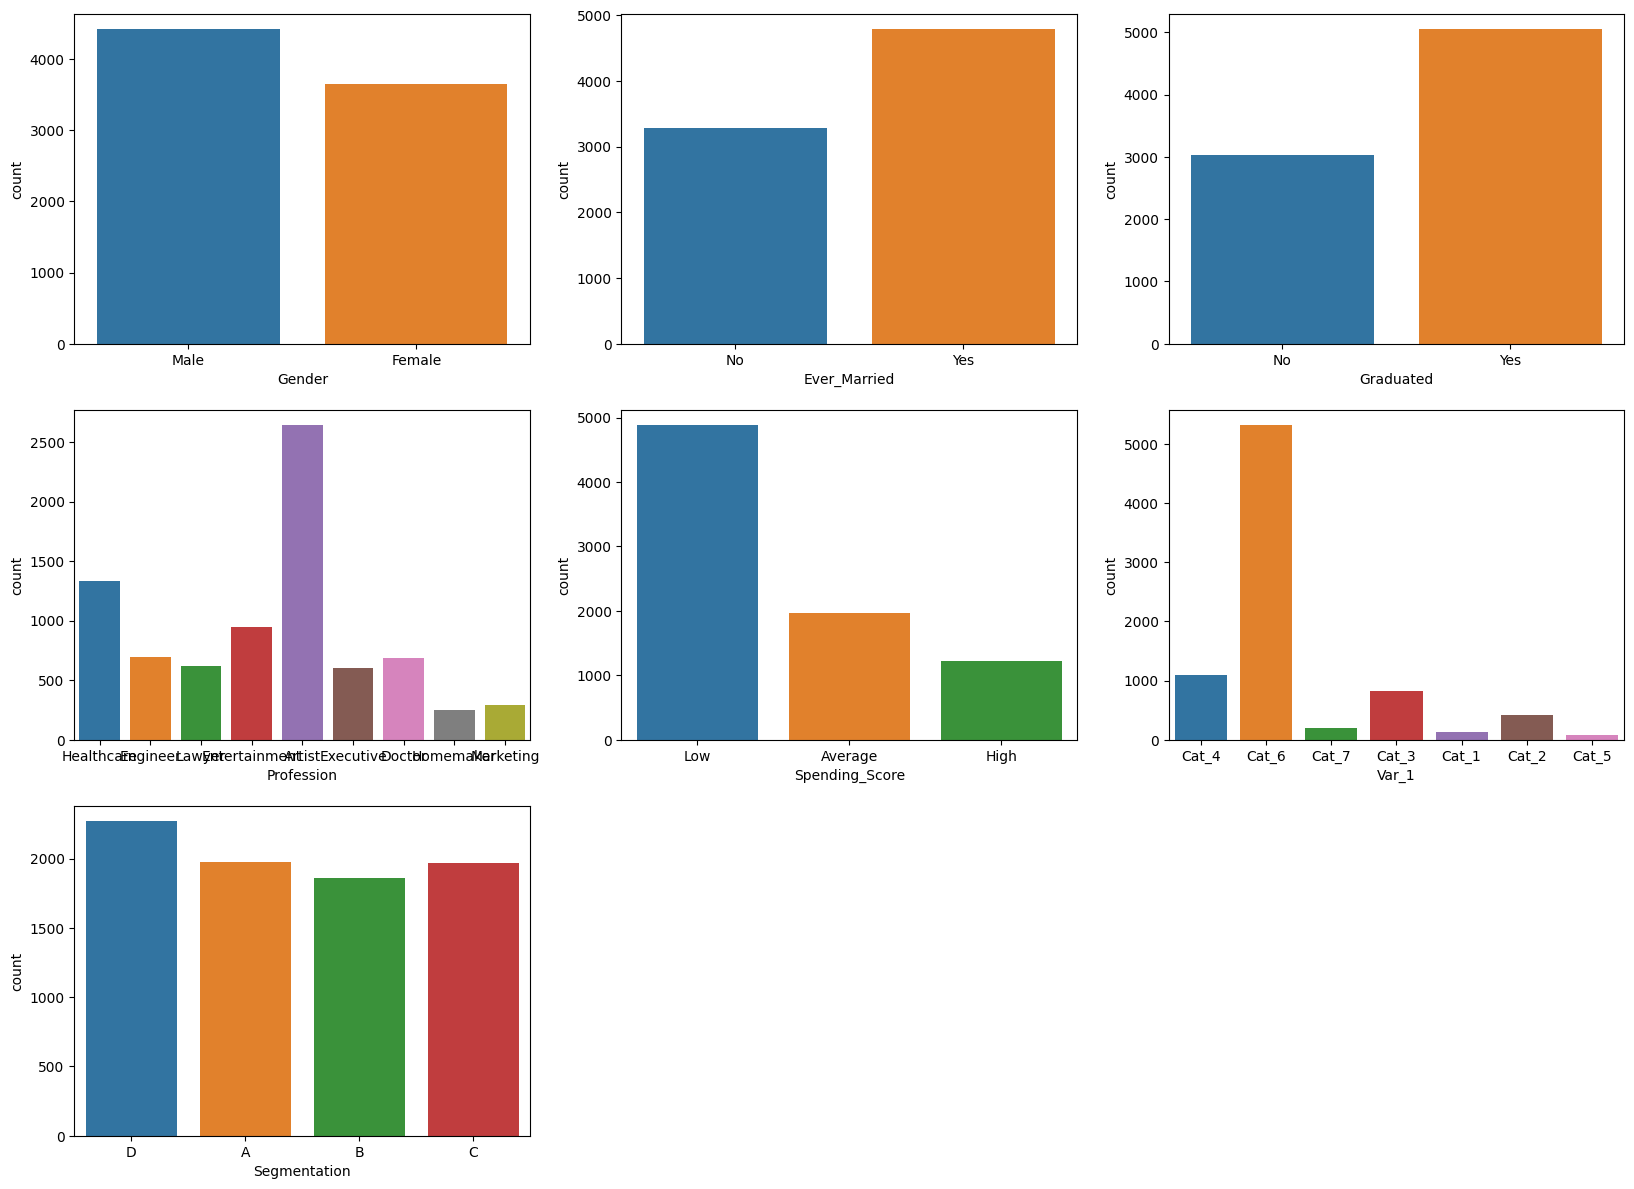

In [10]:
#Plotting other categorical variables
plt.figure(figsize=(20,30))

for i in enumerate(obj.columns):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(x=i[1], data=df)

Since it's difficult to see the values of the possession column, let's view it using a pichart

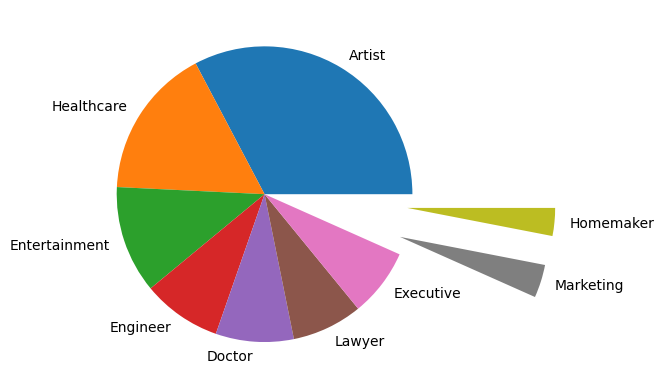

In [11]:
source = df.Profession.value_counts()
values = []
counts = []
for value, count in source.items():
  values.append(value)
  counts.append(count)

min_val = 0.95
percentages = [round(x/sum(counts), 2) for x in counts]
explodes = [1-x if (1-x) > min_val else 0 for x in percentages]

plt.pie(counts, labels=values, explode=explodes)
plt.show()

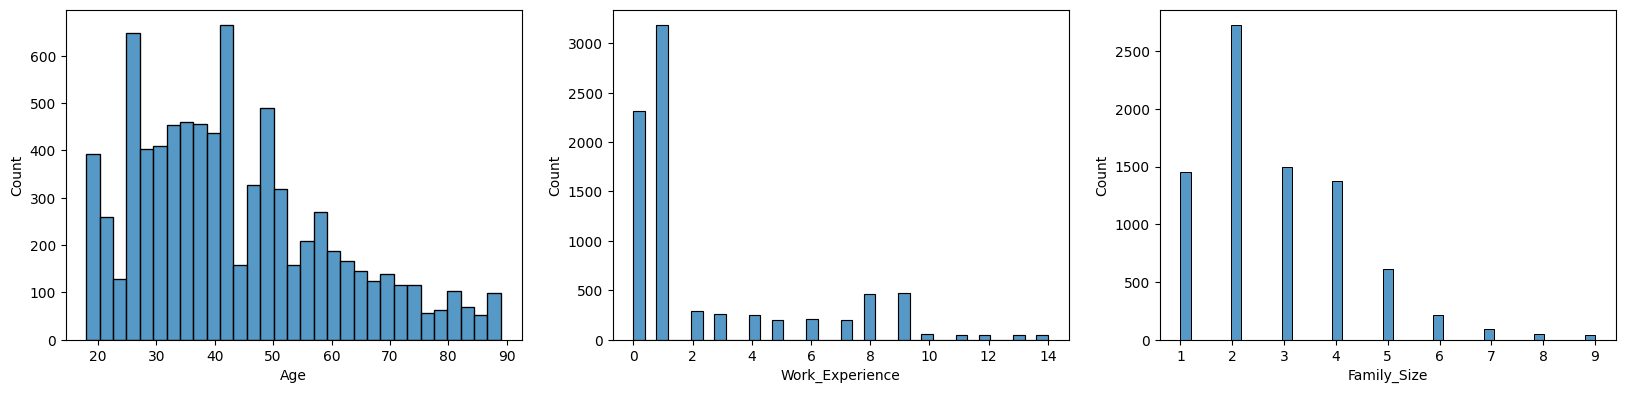

In [12]:
plt.figure(figsize=(20,30))

for i in enumerate(num.columns):
    plt.subplot(6,3,i[0]+1)
    sns.histplot(x=i[1], data=df)

**Bivariate Analysis**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x3000 with 0 Axes>

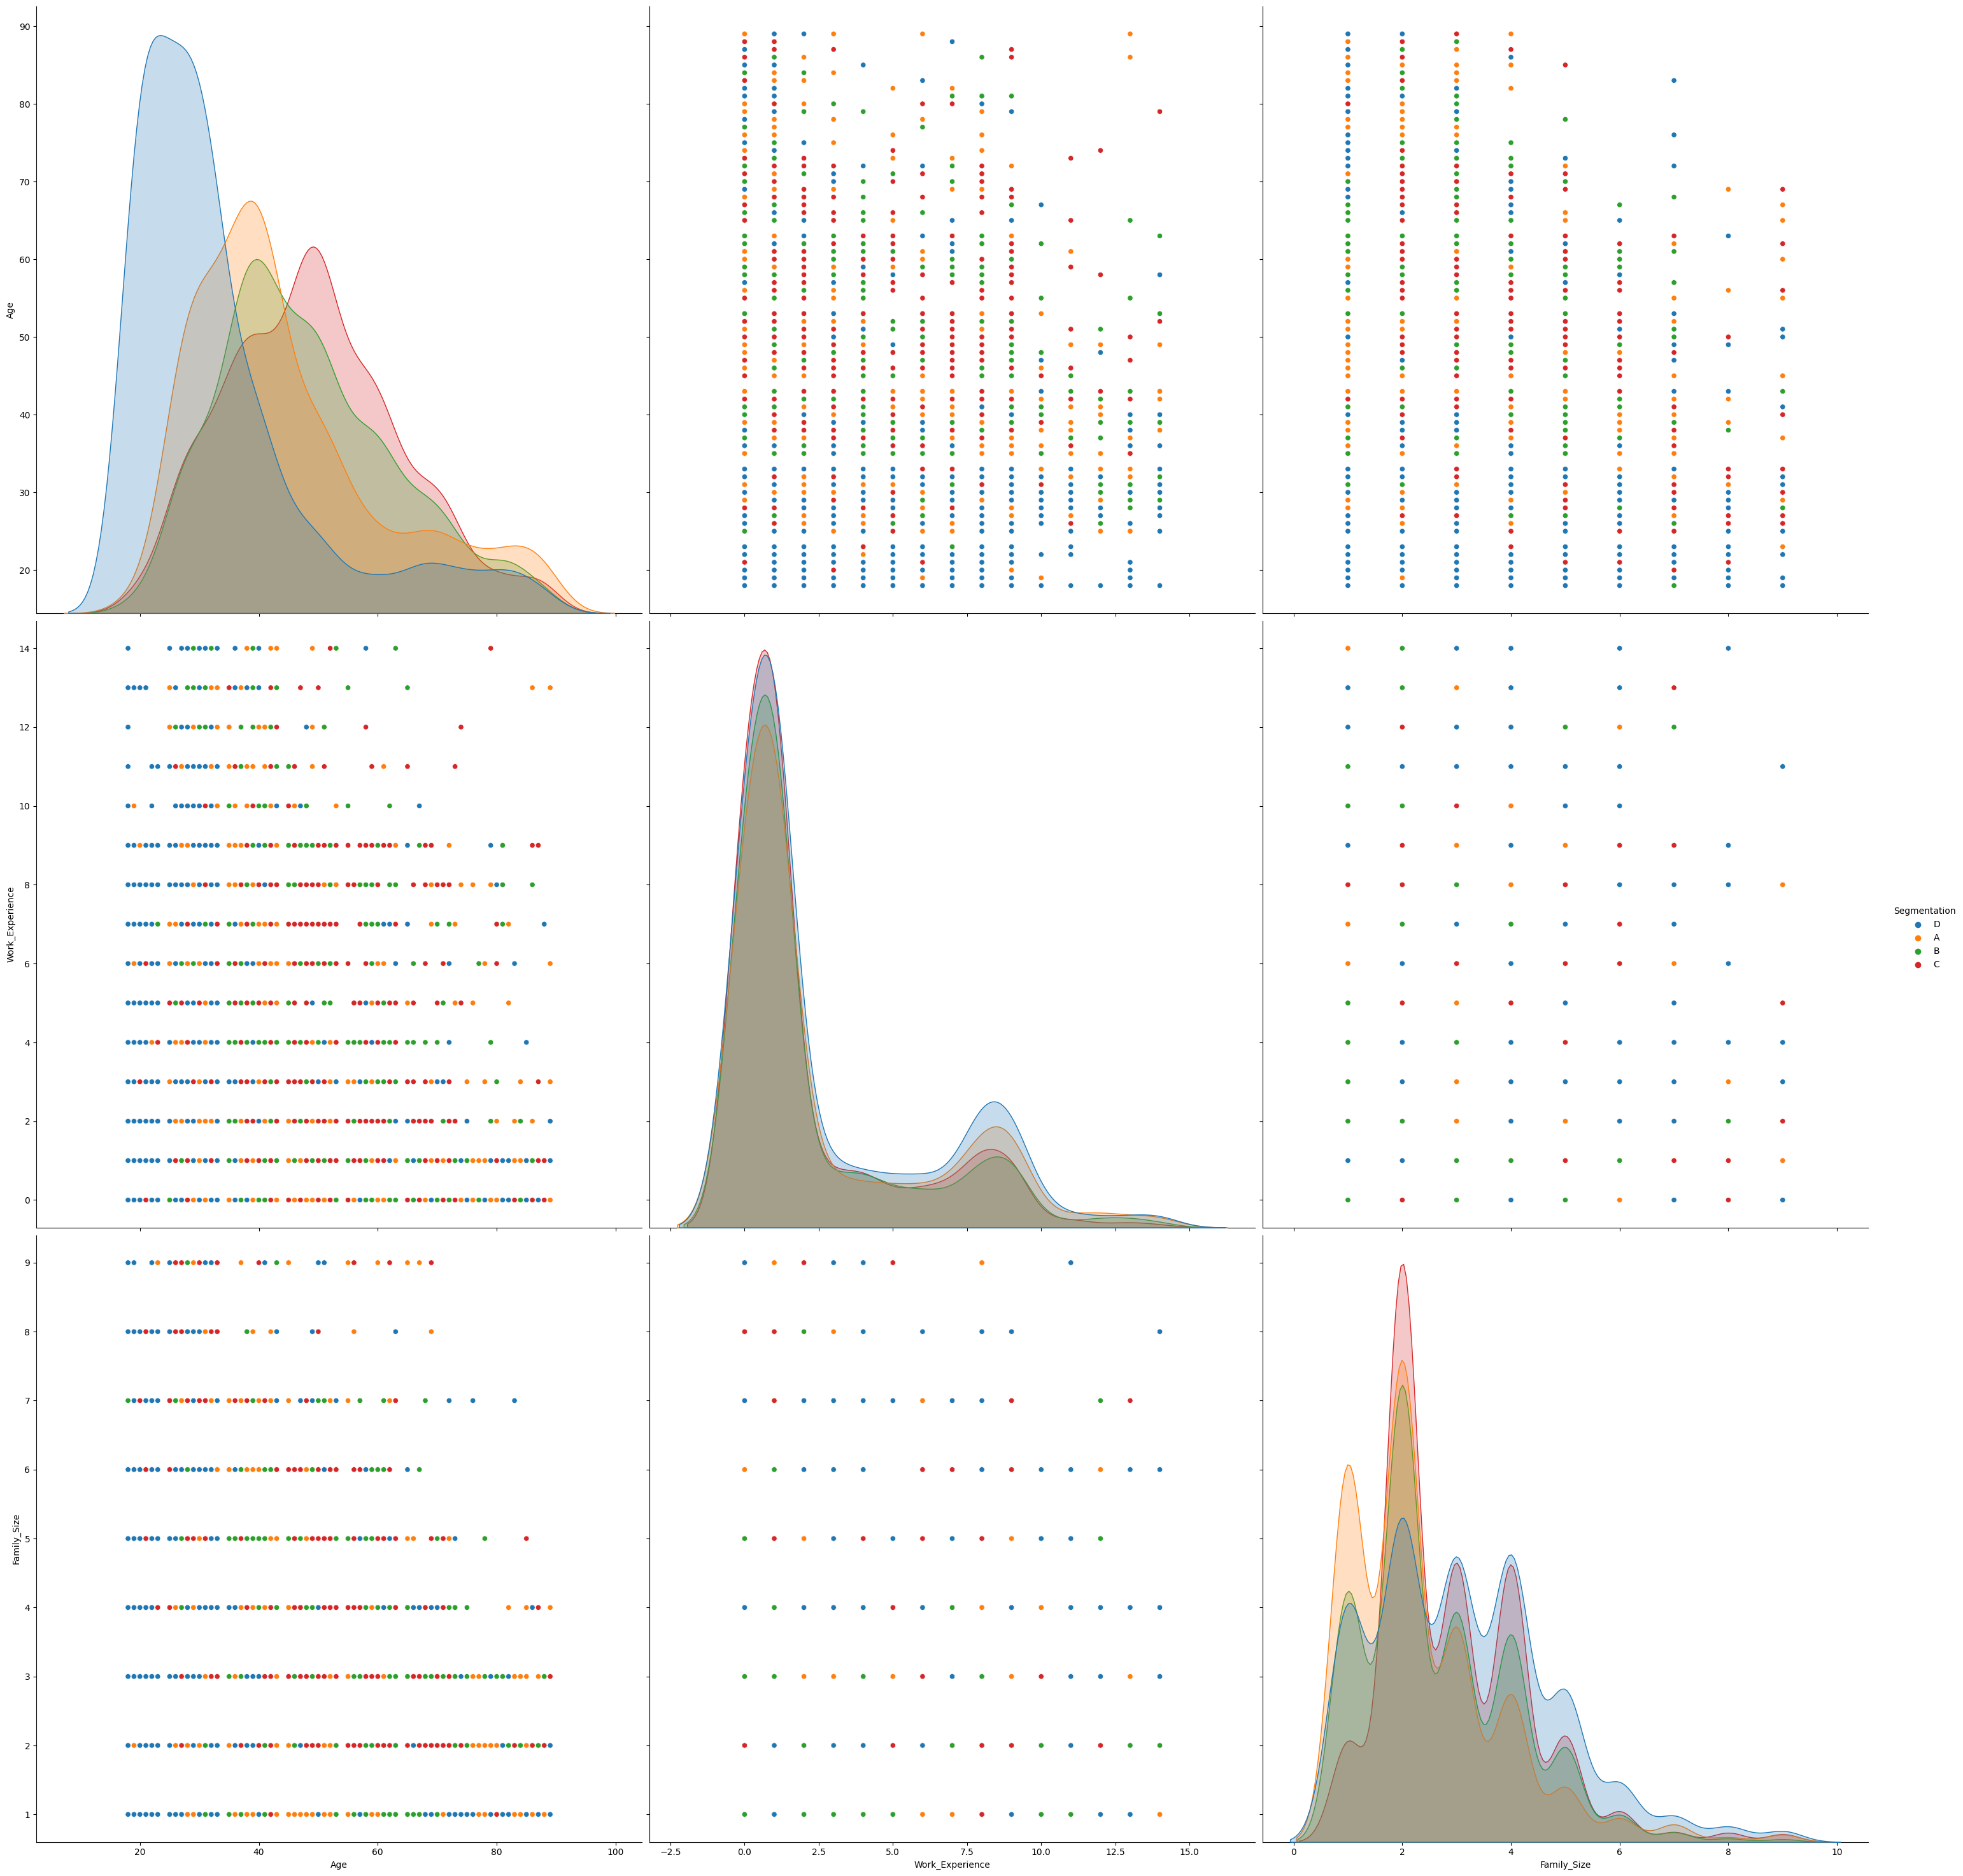

In [13]:
plt.figure(figsize=(10,30))
sns.pairplot(df, hue='Segmentation', height=10)

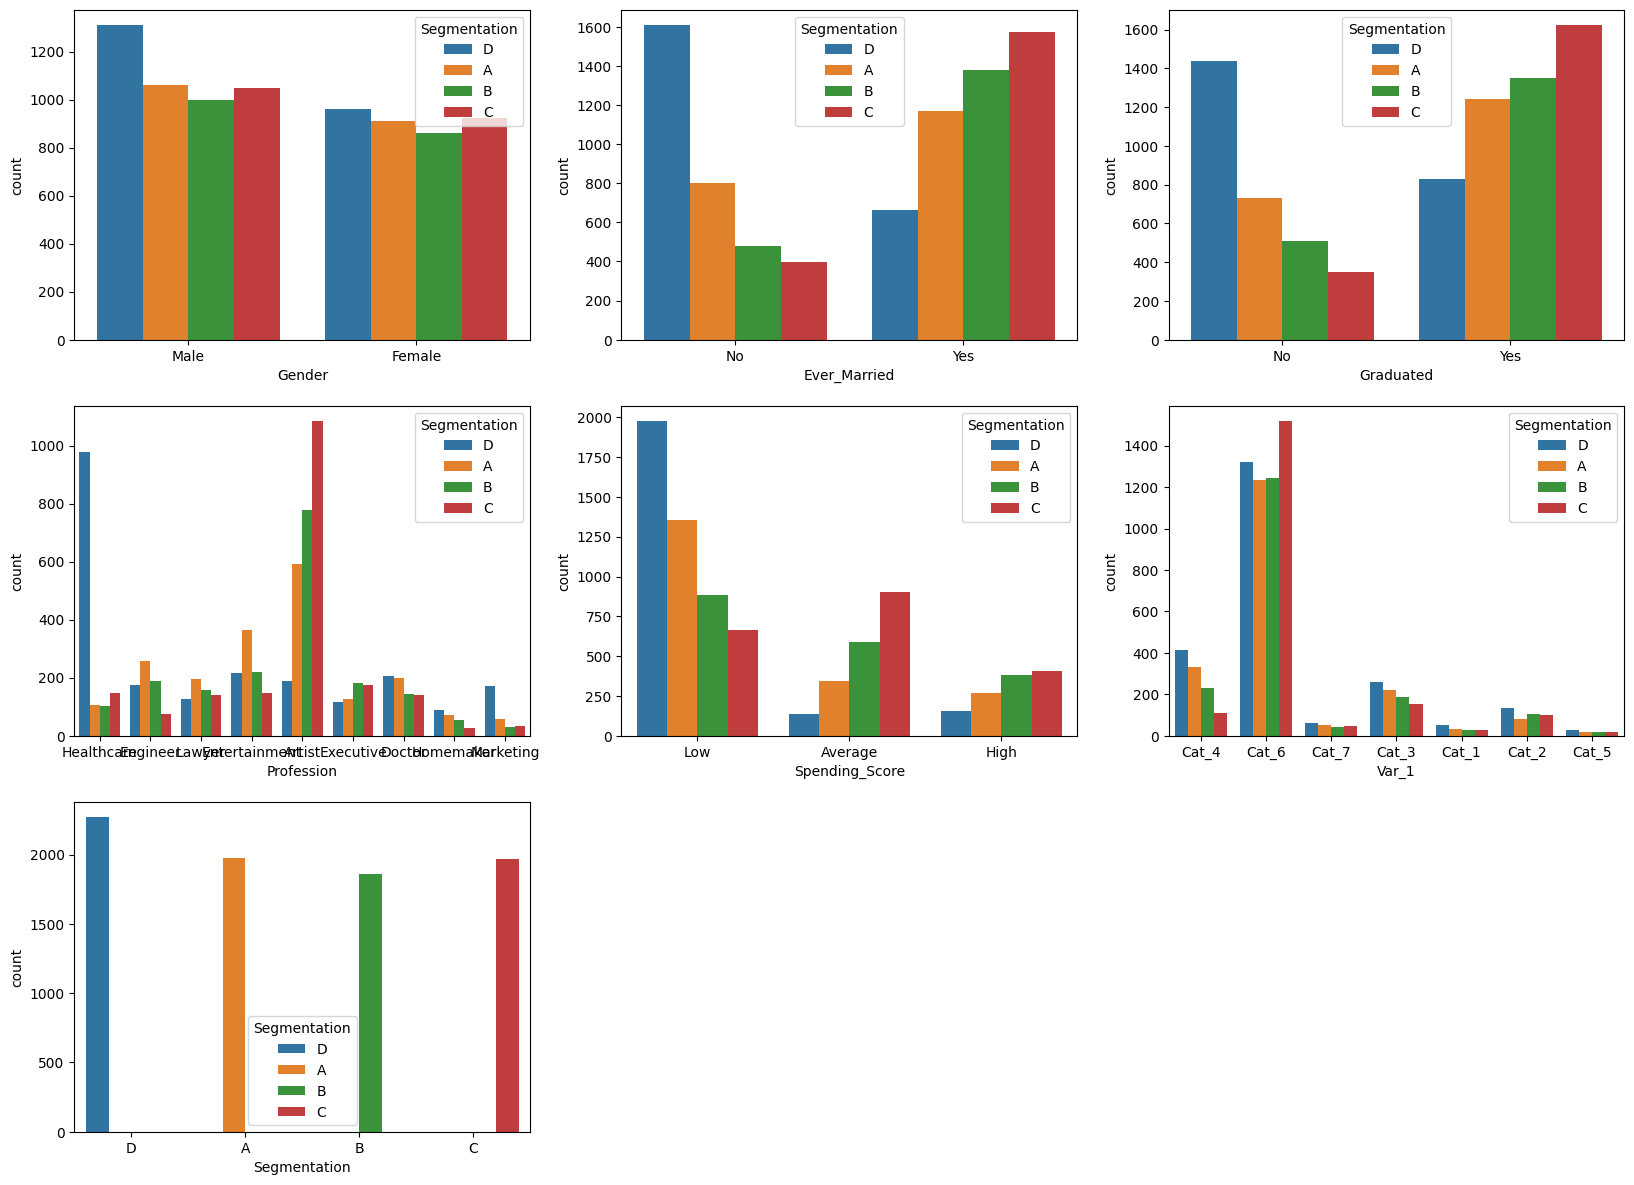

In [14]:
#Plotting categorical variables
plt.figure(figsize=(20,30))

for i in enumerate(obj.columns):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(x=i[1], data=df, hue='Segmentation')

<Axes: xlabel='Profession'>

<Figure size 1200x600 with 0 Axes>

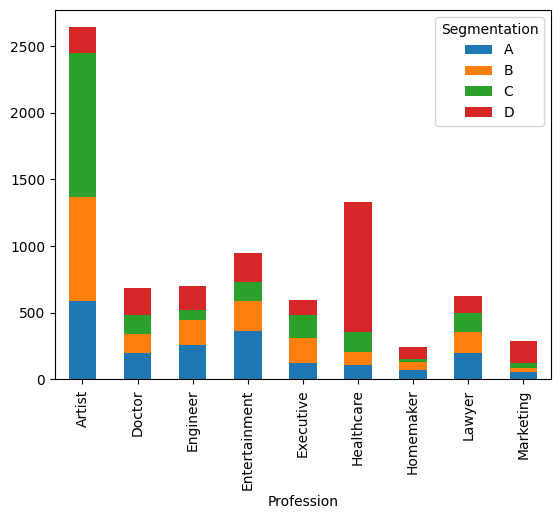

In [15]:
cross_tab = pd.crosstab(df['Profession'], df['Segmentation'])

# Plot the cross-tabulation as a stacked bar chart
plt.figure(figsize=(12, 6))
cross_tab.plot(kind='bar', stacked=True)

By observing the graphs above, we can see that there's no clear relationship between the dependent variable 'Segmentation' and the other variables (no correlation). Therefore, a model built on this dataset will not result in a high accuracy or actionable information